In [ ]:
df <- arrow::read_parquet(here("data", "featurefull.parquet") ) %>% relocate(starts_with("winner"), starts_with("looser"), starts_with("match"), starts_with("tournament"))

relocate: columns reordered (winner.name, winner.id, winner.rank, winner.bornAt, winner.height, …)



In [ ]:
vars <- c(
    "winner.lastTournamentDelayW",
    "looser.lastTournamentDelayW",
    "match.domHands",
    "match.tournamentRound",
    "match.hadTieBreaker", 
    "tournament.dateDistance",
    "match.diffRank",
    "winner.bornAt",
    "looser.bornAt",
    "winner.heightF",
    "looser.heightF",
    "winner.winrate",
    "looser.winrate",
    "winner.njogos",
    "looser.njogos",
    "winner.nTournament",
    "looser.nTournament",
    "match.backHands",
    "tournament.durationF",
    "tournament.quarterL2",
    "tournament.prize"
)
library(formulaic)
library(tictoc)

# huberty index { TODO
    # library(rlang)
    # hubInd_vec <- function(truth, estimate, na_rm = T, case_weights = NULL, ...){
    #     uniq <- unique(truth)
    #     moda <- uniqv[which.max(tabulate(match(v, uniq)))]
    #     Ho   <- accuracy_vec(truth, estimate, na_rm = na_rm, case_weights = case_weights)
    #     He   <- (plyr::count
    # }
    # hubInd <- new_class_metric(\(data, ...) UseMethod("hubInd"), direction = "maximize")
    # hubInd.data.frame <- \(data, truth, estimate, na_rm = T, case_weights = NULL, ...) class_metric_summarizer(
    #     name = "HubertyIndex",
    #     fn
    # )
# }
metrics <- metric_set(accuracy, f_meas, roc_auc, pr_auc)

form <- create.formula(input.names = vars, outcome.name = "match.setsCount", dat = df)
form$formula

match.setsCount ~ winner.lastTournamentDelayW + looser.lastTournamentDelayW + 
    match.domHands + match.tournamentRound + match.hadTieBreaker + 
    tournament.dateDistance + match.diffRank + winner.bornAt + 
    looser.bornAt + winner.heightF + looser.heightF + winner.winrate + 
    looser.winrate + winner.njogos + looser.njogos + winner.nTournament + 
    looser.nTournament + match.backHands + tournament.durationF + 
    tournament.quarterL2 + tournament.prize
<environment: 0x000001cabae5c278>

In [ ]:
df %>% select(all_of(vars)) %>% .[!complete.cases(.), ] %>% glimpse()

select: dropped 48 variables (winner.name, winner.id, winner.rank, winner.height, winner.Anwins, …)



Rows: 505
Columns: 21
$ winner.lastTournamentDelayW <dbl> 2, 2, 22, 16, 3, 3, 3, 3, 3, 5, 1, 1, 1, 7…
$ looser.lastTournamentDelayW <dbl> 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 2, 1, 1, 3, …
$ match.domHands              <fct> Right-Handed_Right-Handed, Right-Handed_Ri…
$ match.tournamentRound       <fct> Round of 64, Round of 64, Round of 32, Rou…
$ match.hadTieBreaker         <lgl> FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, TR…
$ tournament.dateDistance     <drtn> -813456000 secs, -813456000 secs, -828576…
$ match.diffRank              <int> -29, -29, 102, 102, -19, -19, -19, -19, -4…
$ winner.bornAt               <fct> Other, Other, Australia, Australia, Other,…
$ looser.bornAt               <fct> Other, Other, NA, NA, Other, Other, Other,…
$ winner.heightF              <fct> 185, 185, 180, 180, 180, 180, 180, 180, 19…
$ looser.heightF              <fct> 170, 170, 173, 173, 173, 173, 173, 173, 17…
$ winner.winrate              <dbl> 51.13314, 51.13314, 47.24771, 47.24771, 60…
$ looser.winrate  

In [ ]:
df$winner.bornAt %<>% fct_na_value_to_level(level = "Other")
df$looser.bornAt %<>% fct_na_value_to_level(level = "Other")
df$tournament.prize <- if_else(df$tournament.prize %>% is.na, 0, df$tournament.prize)

In [ ]:
df %>% select(all_of(vars)) %>% .[!complete.cases(.),] %>% nrow()

select: dropped 48 variables (winner.name, winner.id, winner.rank, winner.height, winner.Anwins, …)



[1] 0

In [ ]:
df$tournament.dateDistance <- df$tournament.dateDistance/dyears(1) 
df$tournament.dateDistance %>% glimpse()

 num [1:17926] -44.2 -44.2 -44.2 -44.2 -47.2 ...


In [ ]:
df %>% select(all_of(vars)) %>% glimpse()

select: dropped 48 variables (winner.name, winner.id, winner.rank, winner.height, winner.Anwins, …)



Rows: 17,926
Columns: 21
$ winner.lastTournamentDelayW <dbl> 1, 1, 1, 1, 20, 20, 18, 18, 1, 1, 1, 1, 1,…
$ looser.lastTournamentDelayW <dbl> 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 11, 3, 11, 3…
$ match.domHands              <fct> Right-Handed_Left-Handed, Right-Handed_Lef…
$ match.tournamentRound       <fct> Quarter-Finals, Quarter-Finals, Quarter-Fi…
$ match.hadTieBreaker         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ tournament.dateDistance     <dbl> -44.23272, -44.23272, -44.23272, -44.23272…
$ match.diffRank              <int> -65, -65, -65, -65, -438, -438, -438, -438…
$ winner.bornAt               <fct> USA, USA, USA, USA, Other, Other, Other, O…
$ looser.bornAt               <fct> Other, Other, Other, Other, Other, Other, …
$ winner.heightF              <fct> 168, 168, 168, 168, 170, 170, 170, 170, 17…
$ looser.heightF              <fct> 163, 163, 163, 163, 163, 163, 163, 163, 16…
$ winner.winrate              <dbl> 58.73544, 58.73544, 58.73544, 58.73544, 54…
$ looser.winrat

In [ ]:
# folds
set.seed(1)
df.folds <- vfold_cv(df, v = 5, repeats = 5) # no strata
# workflow #this is needed for dummies, since not all do it automatically
recip <- recipe(form$f, df) %>% 
    step_relevel(winner.bornAt       , ref_level="Other") %>%
    step_relevel(looser.bornAt       , ref_level="Other") %>%
    step_relevel(tournament.quarterL2, ref_level="Other") %>%
    step_dummy(all_factor_predictors()) %>% 
    step_mutate(match.hadTieBreaker = ifelse(match.hadTieBreaker, 1, 0) %>% as.double())
wf <- workflow() %>% add_recipe(recip %>% prep(df))
df.folds %>% glimpse()

Rows: 25
Columns: 3
$ splits <list> [<vfold_split[14340 x 3586 x 17926 x 69]>], [<vfold_split[1434…
$ id     <chr> "Repeat1", "Repeat1", "Repeat1", "Repeat1", "Repeat1", "Repeat2…
$ id2    <chr> "Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "Fold1", "Fold2", …


In [ ]:
# logistic regression
lg <- logistic_reg() %>%
    set_engine("glm") %>%
    set_mode("classification")
tic()
    lg.fitted <- fit_resamples(wf %>% add_model(lg), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

→ A | warning: prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases

There were issues with some computations   A: x1
There were issues with some computations   A: x2
There were issues with some computations   A: x3
There were issues with some computations   A: x3




24.27 sec elapsed


In [ ]:
collect_metrics(lg.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.6777861
f_meas,0.7863830
pr_auc,0.7603074
roc_auc,0.6406441


In [ ]:
# svm linear was giving error with kernlab, and LiblineaR doesn't give probabilities
# so gradient-boosted trees 
boost <- boost_tree() %>%
    set_engine("xgboost") %>%
    set_mode("classification")

tic()
    boost.fitted <- fit_resamples(wf %>% add_model(boost), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

18.42 sec elapsed


In [ ]:
collect_metrics(boost.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.7349323
f_meas,0.8241976
pr_auc,0.8559557
roc_auc,0.7710173


In [ ]:
# decision tree
dt <- decision_tree() %>%
    set_engine("rpart") %>% 
    set_mode("classification")

tic()
    dt.fitted <- fit_resamples(wf %>% add_model(dt), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

35.25 sec elapsed


In [ ]:
collect_metrics(dt.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.6787456
f_meas,0.7843147
pr_auc,0.8317643
roc_auc,0.5921127


In [ ]:
# naive Bayes
library(discrim)
nb <- naive_Bayes() %>%
    set_engine("naivebayes") %>% 
    set_mode("classification")

tic()
    nb.fitted <- fit_resamples(wf %>% add_model(nb), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)
detach("package:discrim")

11.08 sec elapsed


In [ ]:
collect_metrics(nb.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.6601917
f_meas,0.7950645
pr_auc,0.7660650
roc_auc,0.6427881


In [ ]:
# random forest
rf <- rand_forest() %>%
    set_engine("ranger") %>% 
    set_mode("classification")
set.seed(1)
tic()
    rf.fitted <- fit_resamples(wf %>% add_model(rf), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)

In [ ]:
collect_metrics(rf.fitted) %>% select(metrica = .metric, valor = mean)

select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.9158763
f_meas,0.9394575
pr_auc,0.9891107
roc_auc,0.9816119


In [ ]:
# comparasion between full random forest and only important features
rel_vars <- c(
    "winner.bornAt",
    "winner.heightF",
    "winner.lastTournamentDelayW",
    "winner.winrate",
    "looser.njogos",
    "looser.winrate",
    "match.diffRank",
    "match.domHands",
    "match.hadTieBreaker",
    "tournament.dateDistance",
    "tournament.durationF",
    "tournament.prize",
    "tournament.quarterL2"
)

create.formula(input.names = rel_vars, outcome.name = "match.setsCount", dat = df)$formula -> imp_form
recip.rel <- recipe(imp_form, df) %>% 
    step_relevel(winner.bornAt       , ref_level="Other") %>%
    step_relevel(tournament.quarterL2, ref_level="Other") %>%
    step_dummy(all_factor_predictors()) %>% 
    step_mutate(match.hadTieBreaker = ifelse(match.hadTieBreaker, 1, 0) %>% as.double())
wf.tune <- workflow() %>% add_recipe(recip.rel %>% prep(df))
wf.tune

══ Workflow ══════════════════════════════════════════════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: None

── Preprocessor ──────────────────────────────────────────────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_relevel()
• step_relevel()
• step_dummy()
• step_mutate()

In [ ]:
tic()
    rf.imp.fitted <- fit_resamples(wf.tune %>% add_model(rf), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)
collect_metrics(rf.imp.fitted) %>% select(metrica = .metric, valor = mean)

173.72 sec elapsed


select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.9300011
f_meas,0.9489111
pr_auc,0.9891023
roc_auc,0.9817325


In [ ]:
# random forest tuning
rf.tuning <- rand_forest(
    mtry  = tune("n_predictors"),
    trees = tune("n_trees"),
    min_n = tune("min_node")
) %>%
    set_engine("ranger") %>% 
    set_mode("classification")

rf.tuning.wf <- wf.tune %>% add_model(rf.tuning)
rf.tuning.params <- rf.tuning.wf %>% extract_parameter_set_dials() %>% update(
    n_predictors = dials::mtry(c(1,6)),
    n_trees      = dials::trees(c(500, 750)),
    min_node     = dials::min_n(c(5, 20))
)
rf.tuning.params

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
mtry,n_predictors,model_spec,rand_forest,main,"integer, 1, 6, TRUE, TRUE, # Randomly Selected Predictors, function (object, x, log_vals = FALSE, ...) , {, if (!inherits(object, ""param"")) {, rlang::abort(""`object` should be a 'param' object.""), }, rngs <- range_get(object, original = FALSE), if (!is_unknown(rngs$upper)) {, return(object), }, x_dims <- dim(x), if (is.null(x_dims)) {, rlang::abort(""Cannot determine number of columns. Is `x` a 2D data object?""), }, if (log_vals) {, rngs[2] <- log10(x_dims[2]), }, else {, rngs[2] <- x_dims[2], }, if (object$type == ""integer"" & is.null(object$trans)) {, rngs <- as.integer(rngs), }, range_set(object, rngs), }"
trees,n_trees,model_spec,rand_forest,main,"integer, 500 , 750 , TRUE , TRUE , # Trees"
min_n,min_node,model_spec,rand_forest,main,"integer, 5, 20, TRUE, TRUE, Minimal Node Size, function (object, x, log_vals = FALSE, frac = 1/3, ...) , {, if (!inherits(object, ""param"")) {, rlang::abort(""`object` should be a 'param' object.""), }, rngs <- range_get(object, original = FALSE), if (!is_unknown(rngs$upper)) {, return(object), }, x_dims <- dim(x), if (is.null(x_dims)) {, rlang::abort(""Cannot determine number of columns. Is `x` a 2D data object?""), }, n_frac <- floor(x_dims[1] * frac), if (log_vals) {, rngs[2] <- log10(n_frac), }, else {, rngs[2] <- n_frac, }, if (object$type == ""integer"" & is.null(object$trans) & !log_vals) {, rngs <- as.integer(rngs), }, range_set(object, rngs), }"


In [ ]:
ctrl <- control_bayes(verbose = TRUE)
set.seed(1)
# expected 1:30 hour
tic()
rf.tunning.search <- tune_bayes(
    rf.tuning.wf,
    resamples = df.folds, 
    initial = 5, 
    iter = 20,
    param_info = rf.tuning.params,
    control = ctrl,
    metrics = metric_set(f_meas, roc_auc, pr_auc, accuracy)
)
toc(log = T)



❯  Generating a set of 5 initial parameter results

✓ Initialization complete





── Iteration 1 ───────────────────────────────────────────────────────────────────────────────────────────────────────────



i Current best:		f_meas=0.9338 (@iter 0)

i Gaussian process model

✓ Gaussian process model

i Generating 4483 candidates

i Predicted candidates

i n_predictors=5, n_trees=744, min_node=5

i Estimating performance

i Fold1, Repeat1: preprocessor 1/1

✓ Fold1, Repeat1: preprocessor 1/1

i Fold1, Repeat1: preprocessor 1/1, model 1/1

✓ Fold1, Repeat1: preprocessor 1/1, model 1/1

i Fold1, Repeat1: preprocessor 1/1, model 1/1 (extracts)

i Fold1, Repeat1: preprocessor 1/1, model 1/1 (predictions)

i Fold2, Repeat1: preprocessor 1/1

✓ Fold2, Repeat1: preprocessor 1/1

i Fold2, Repeat1: preprocessor 1/1, model 1/1

✓ Fold2, Repeat1: preprocessor 1/1, model 1/1

i Fold2, Repeat1: preprocessor 1/1, model 1/1 (extracts)

i Fold2, Repeat1: preprocessor 1/1, model 1/1 (predictions)

i 

5716.23 sec elapsed


In [ ]:
collect_metrics(rf.tunning.search) %>% group_by(.config) %>% group_split()

group_by: one grouping variable (.config)



n_predictors,n_trees,min_node,.metric,.estimator,mean,n,std_err,.config,.iter
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>
5,744,5,accuracy,binary,0.9352449,25,0.0010570776,Iter1,1
5,744,5,f_meas,binary,0.9526531,25,0.0008195492,Iter1,1
5,744,5,pr_auc,binary,0.9908308,25,0.0002936010,Iter1,1
5,744,5,roc_auc,binary,0.9847092,25,0.0004479655,Iter1,1
n_predictors,n_trees,min_node,.metric,.estimator,mean,n,std_err,.config,.iter
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>
6,613,5,accuracy,binary,0.9482651,25,0.0008070995,Iter10,10
6,613,5,f_meas,binary,0.9617691,25,0.0006284930,Iter10,10
6,613,5,pr_auc,binary,0.9923246,25,0.0002755706,Iter10,10


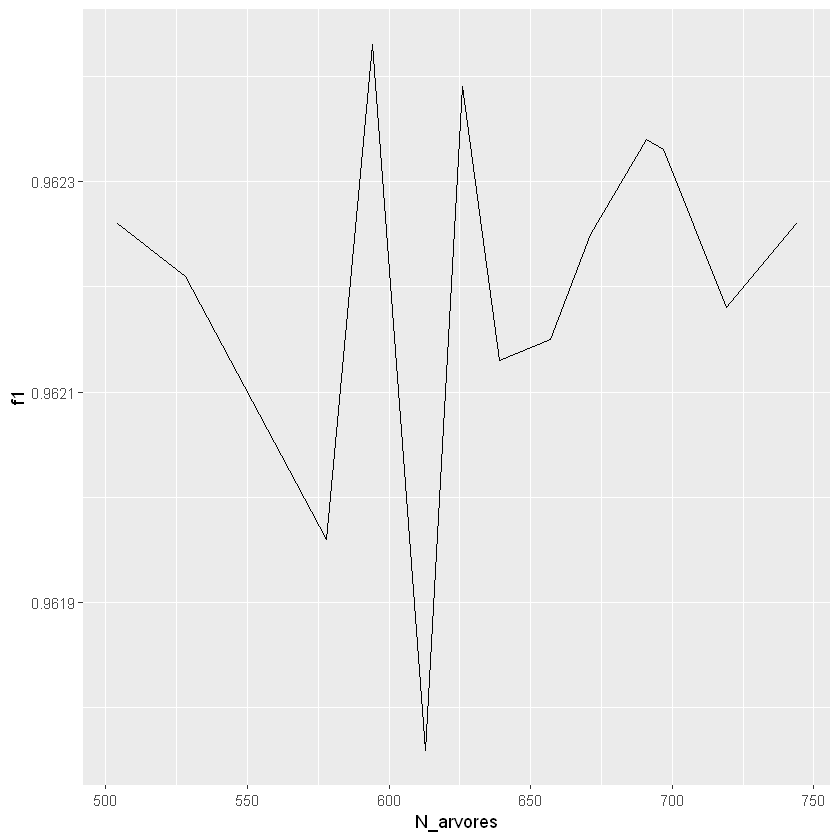

In [ ]:
tribble(
    ~N_arvores, ~f1,
	744, 0.96226,
	504, 0.96226,
	626, 0.96239,
	594, 0.96243,
	578, 0.96196,
	697, 0.96233,
	657, 0.96215,
	613, 0.96176,
	719, 0.96218,
	528, 0.96221,
	639, 0.96213,
	671, 0.96225,
	691, 0.96234
) %>% ggplot(aes(x = N_arvores, y=f1)) + geom_line()
ggsave(here("relatorio", "hyper.png"), width = 10, height = 10)

In [ ]:
# gradient boosting tuning
boost.tuning <- boost_tree(
    trees = tune("n_trees"),
    tree_depth = tune("tree_depth"),
    min_n = tune("min_node"),
    loss_reduction = tune("loss_reduction")
) %>%
    set_engine("xgboost") %>% 
    set_mode("classification")

boost.tuning.wf <- wf.tune %>% add_model(boost.tuning)
boost.tuning.params <- boost.tuning.wf %>% extract_parameter_set_dials() %>% update(
    n_trees = dials::trees(c(10, 20)),
    tree_depth = dials::tree_depth(c(3, 9)),
    min_node = dials::min_n(c(1, 5)),
    loss_reduction = dials::loss_reduction(c(-10, 1.5))
)
boost.tuning.params

name,id,source,component,component_id,object
<chr>,<chr>,<chr>,<chr>,<chr>,<list>
trees,n_trees,model_spec,boost_tree,main,"integer, 10 , 20 , TRUE , TRUE , # Trees"
min_n,min_node,model_spec,boost_tree,main,"integer, 1, 5, TRUE, TRUE, Minimal Node Size, function (object, x, log_vals = FALSE, frac = 1/3, ...) , {, if (!inherits(object, ""param"")) {, rlang::abort(""`object` should be a 'param' object.""), }, rngs <- range_get(object, original = FALSE), if (!is_unknown(rngs$upper)) {, return(object), }, x_dims <- dim(x), if (is.null(x_dims)) {, rlang::abort(""Cannot determine number of columns. Is `x` a 2D data object?""), }, n_frac <- floor(x_dims[1] * frac), if (log_vals) {, rngs[2] <- log10(n_frac), }, else {, rngs[2] <- n_frac, }, if (object$type == ""integer"" & is.null(object$trans) & !log_vals) {, rngs <- as.integer(rngs), }, range_set(object, rngs), }"
tree_depth,tree_depth,model_spec,boost_tree,main,"integer , 3 , 9 , TRUE , TRUE , Tree Depth"
loss_reduction,loss_reduction,model_spec,boost_tree,main,"double, -10, 1.5, TRUE, TRUE, log-10, function (x) , log(x, base), function (x) , base^x, function (x, n = n_default) , {, raw_rng <- suppressWarnings(range(x, na.rm = TRUE)), if (any(!is.finite(raw_rng))) {, return(numeric()), }, rng <- log(raw_rng, base = base), min <- floor(rng[1]), max <- ceiling(rng[2]), if (max == min) {, return(base^min), }, by <- floor((max - min)/n) + 1, breaks <- base^seq(min, max, by = by), relevant_breaks <- base^rng[1] <= breaks & breaks <= base^rng[2], if (sum(relevant_breaks) >= (n - 2)) {, return(breaks), }, while (by > 1) {, by <- by - 1, breaks <- base^seq(min, max, by = by), relevant_breaks <- base^rng[1] <= breaks & breaks <= , base^rng[2], if (sum(relevant_breaks) >= (n - 2)) {, return(breaks), }, }, log_sub_breaks(rng, n = n, base = base), }, function (b, limits, n) , {, b <- b[!is.na(b)], if (length(b) < 2) {, return(), }, bd <- diff(b)[1], if (!reverse) {, if (min(limits) < min(b)) , b <- c(b[1] - bd, b), if (max(limits) > max(b)) , b <- c(b, b[length(b)] + bd), }, else {, if (max(limits) > max(b)) , b <- c(b[1] - bd, b), if (min(limits) < min(b)) , b <- c(b, b[length(b)] + bd), }, seq_between <- function(a, b) {, seq(a, b, length.out = n + 1)[-(n + 1)], }, breaks <- unlist(Map(seq_between, b[-length(b)], b[-1])), breaks <- c(breaks, b[length(b)]), breaks, }, function (x) , {, if (!is.null(names(x))) {, return(names(x)), }, ret <- format(x, ..., trim = TRUE, justify = ""left""), ret[is.na(x)] <- NA, ret, }, 1e-100, Inf, Minimum Loss Reduction"


In [ ]:
ctrl <- control_bayes(verbose_iter = TRUE)
set.seed(1)

tic()
boost.tunning.search <- tune_bayes(
    boost.tuning.wf,
    resamples = df.folds, 
    initial = 10, 
    iter = 50,
    param_info = boost.tuning.params,
    control = ctrl,
    metrics = metric_set(f_meas, roc_auc, pr_auc, accuracy)
)
toc(log = T)

Optimizing f_meas using the expected improvement

! No improvement for 10 iterations; returning current results.



368.9 sec elapsed


In [ ]:
collect_metrics(boost.tunning.search) %>% group_by(.config) %>% group_split() %>% 

group_by: one grouping variable (.config)



n_trees,min_node,tree_depth,loss_reduction,.metric,.estimator,mean,n,std_err,.config,.iter
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>
20,1,8,2.848112e-10,accuracy,binary,0.7983040,25,0.002008875,Iter1,1
20,1,8,2.848112e-10,f_meas,binary,0.8622815,25,0.001368025,Iter1,1
20,1,8,2.848112e-10,pr_auc,binary,0.9182018,25,0.001627584,Iter1,1
20,1,8,2.848112e-10,roc_auc,binary,0.8675635,25,0.002311137,Iter1,1
n_trees,min_node,tree_depth,loss_reduction,.metric,.estimator,mean,n,std_err,.config,.iter
<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<int>
20,1,9,5.11239e-07,accuracy,binary,0.8268321,25,0.002007172,Iter10,10
20,1,9,5.11239e-07,f_meas,binary,0.8798930,25,0.001427782,Iter10,10
20,1,9,5.11239e-07,pr_auc,binary,0.9370780,25,0.001406583,Iter10,10


In [ ]:
#rf without match.hadTieBreaker 
# random forest
set.seed(1)
form.noTieB <- create.formula(input.names = rel_vars[ !rel_vars == 'match.hadTieBreaker'], outcome.name = "match.setsCount", dat = df)
recip.noTieB <- recipe(form.noTieB$formula, df) %>% 
    step_relevel(winner.bornAt       , ref_level="Other") %>%
    step_relevel(tournament.quarterL2, ref_level="Other") %>%
    step_dummy(all_factor_predictors())

wf.noTieB <- workflow() %>% add_recipe(recip.noTieB %>% prep(df))


rf.noTieB <- rand_forest(
    mtry = 6,
    trees = 594,
    min_n = 5
) %>%
    set_engine("ranger") %>% 
    set_mode("classification")
set.seed(1)
tic()
    rf.noTieB.fitted <- fit_resamples(wf.noTieB %>% add_model(rf.noTieB), df.folds, metrics = metrics, control = control_resamples(save_pred = TRUE))
toc(log=T)
collect_metrics(rf.noTieB.fitted) %>% select(metrica = .metric, valor = mean)

190.17 sec elapsed


select: renamed 2 variables (metrica, valor) and dropped 4 variables



metrica,valor
<chr>,<dbl>
accuracy,0.9461676
f_meas,0.9603311
pr_auc,0.9918528
roc_auc,0.9865114


In [ ]:
form.noTieB$formula

match.setsCount ~ winner.bornAt + winner.heightF + winner.lastTournamentDelayW + 
    winner.winrate + looser.njogos + looser.winrate + match.diffRank + 
    match.domHands + tournament.dateDistance + tournament.durationF + 
    tournament.prize + tournament.quarterL2
<environment: 0x000001cac1dad668>

In [ ]:
set.seed(1)
rf.noTieB %>% set_engine("ranger",  importance = "impurity") %>% fit(form.noTieB$formula, data=df) -> fitted.imp
fitted.imp %>% vip::vi()

Variable,Importance
<chr>,<dbl>
match.diffRank,1533.11413
winner.winrate,1114.66164
tournament.dateDistance,1055.90408
looser.njogos,892.24521
looser.winrate,884.79736
winner.heightF,587.21029
tournament.prize,530.07044
winner.lastTournamentDelayW,499.86857
tournament.quarterL2,196.87270


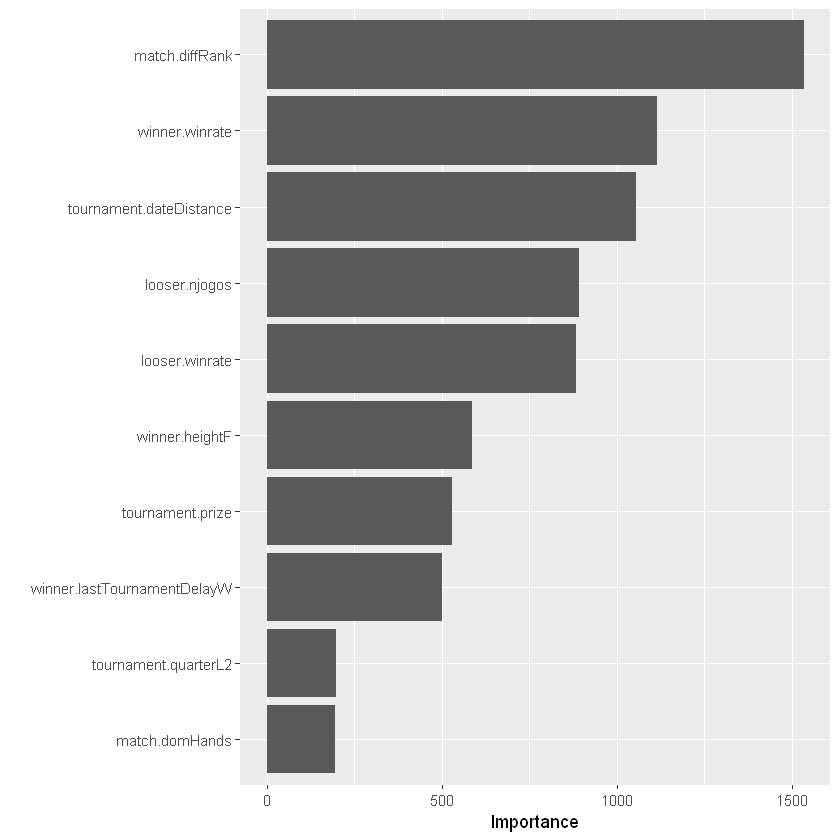

In [ ]:
fitted.imp %>% vip::vip()

In [ ]:
rf.noTieB %>% set_engine("ranger",  importance = "permutation") %>% fit(form.noTieB$formula, data=df) -> fitted.perm
fitted.perm %>% vip::vi()

Variable,Importance
<chr>,<dbl>
match.diffRank,0.230565146
winner.winrate,0.195729757
looser.winrate,0.188343561
looser.njogos,0.160100698
tournament.dateDistance,0.153283431
tournament.prize,0.112169347
winner.heightF,0.090282672
winner.lastTournamentDelayW,0.068389168
winner.bornAt,0.042690587


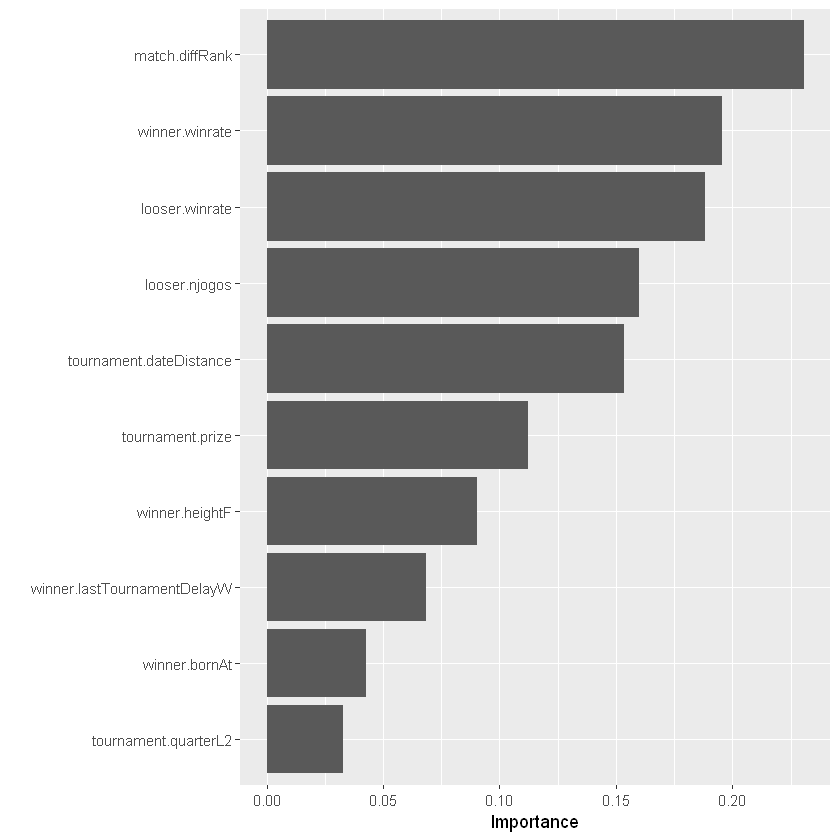

In [ ]:
fitted.perm %>% vip::vip()